## Analyses

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
import glob
import itertools
import random

In [2]:
fs = glob.glob('diversity_abm/logs/12_02_23/0_back/flexible/*') 

In [88]:
backup_adf = adf.copy()
# for avg_dist_remain, avg_knnd, var_knnd (?), compute slope or truncate! 

In [89]:
adf = []
for f in fs:
    df = pd.read_csv(f)
    df['resp_knnd_5_diff'] = abs(df['resp_knnd_5_a0'] - df['resp_knnd_5_a1'])
    aggs = df.groupby(['log_id', 'iter']).agg({'prob0': 'mean',
                                        'prob1': 'mean',
                                        'turn': 'max',
                                        'avg_dist_remain': lambda x: x[:-1].mean(), # compute slope
                                        'resp_knnd_5_a0': lambda x: x[:-1].mean(), # dynamic 
                                        'avg_knnd_5_a0': lambda x: x[:-1].mean(), # compute slope
                                        'var_knnd_5_a0': lambda x: x[:-1].mean(), # compute slope
                                        'avg_dist_remain.1': lambda x: x[:-1].mean(),
                                        'resp_knnd_5_a1': lambda x: x[:-1].mean(),
                                        'avg_knnd_5_a1': lambda x: x[:-1].mean(),
                                        'var_knnd_5_a1': lambda x: x[:-1].mean(),
                                        'resp_knnd_5_diff': lambda x: x[:-1].mean(),
                                        'vecvar_a0': 'last',
                                        'vecvar_a1': 'last'
                                        }).reset_index()
    adf.append(aggs)

KeyboardInterrupt: 

In [60]:
adf_2 = []
for a in adf:
    adf_2.append(a.groupby('log_id').mean().reset_index())

In [61]:
pair_level_agg = pd.concat(adf_2)

In [62]:
pair_level_agg['distance_level'] = pair_level_agg.log_id.apply(lambda x: x.split('_')[1]).astype(int)

In [95]:
pair_level_agg

,log_id,iter,prob0,prob1,turn,avg_dist_remain,resp_knnd_5_a0,avg_knnd_5_a0,var_knnd_5_a0,avg_dist_remain.1,resp_knnd_5_a1,avg_knnd_5_a1,var_knnd_5_a1,resp_knnd_5_diff,vecvar_a0,vecvar_a1,distance_level
0,wiki_7_98_wiki_0_80,119.500000,0.010440,0.010469,117.439655,0.012840,95.127454,0.011289,0.000620,0.012839,95.123854,0.011285,0.000622,2.892596,0.029429,0.029431,7
0,wiki_4_32_wiki_0_75,119.500000,0.010099,0.010139,121.823276,0.012840,94.911597,0.011305,0.000621,0.012841,94.926908,0.011306,0.000620,1.914732,0.029601,0.029588,4
0,wiki_6_10_wiki_0_31,119.500000,0.010322,0.010385,114.737069,0.012824,94.940715,0.011280,0.000628,0.012823,94.885505,0.011275,0.000630,2.989770,0.029659,0.029671,6
0,wiki_8_5_wiki_0_9,119.500000,0.010560,0.010551,135.448276,0.012858,94.644180,0.011346,0.000595,0.012859,94.637103,0.011343,0.000599,3.420461,0.029787,0.029775,8
0,wiki_20_84_wiki_0_97,119.564655,0.011051,0.011657,16.991379,0.012737,93.999019,0.011016,0.000716,0.012735,92.664146,0.011014,0.000718,8.118201,0.027521,0.029114,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,wiki_12_5_wiki_0_79,119.500000,0.010975,0.010945,144.344828,0.012848,94.171819,0.011345,0.000610,0.012849,94.094591,0.011335,0.000613,4.373842,0.030132,0.030157,12
0,wiki_0_1_wiki_0_36,119.500000,0.009846,0.009840,118.525862,0.012836,95.122883,0.011292,0.000619,0.012836,95.122883,0.011292,0.000619,0.245828,0.029434,0.029434,0
0,wiki_11_6_wiki_0_20,119.500000,0.010822,0.010770,123.387931,0.012842,94.797855,0.011299,0.000618,0.012839,94.778583,0.011296,0.000624,3.909234,0.029741,0.029723,11
0,wiki_18_87_wiki_0_33,119.500000,0.011063,0.011412,53.560345,0.012764,95.055685,0.011092,0.000698,0.012754,92.817855,0.011079,0.000708,6.939213,0.029061,0.030303,18


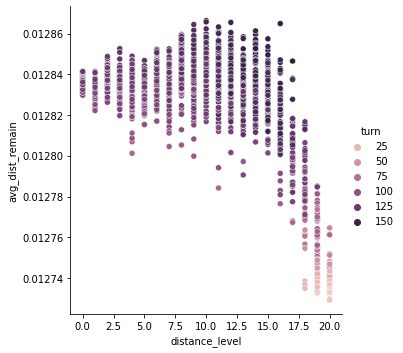

In [98]:
sns.relplot(data=pair_level_agg, x='distance_level', y='avg_dist_remain', hue='turn')
# avg_dist_remain is not a good metric, unless computed at turn 100?
# 

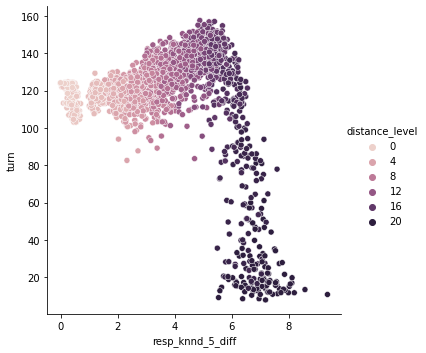

In [81]:
sns.relplot(data=pair_level_agg, x='resp_knnd_5_diff', y='turn', hue='distance_level')
# avg_dist_remain is not a good metric, unless computed at turn 100?
# 

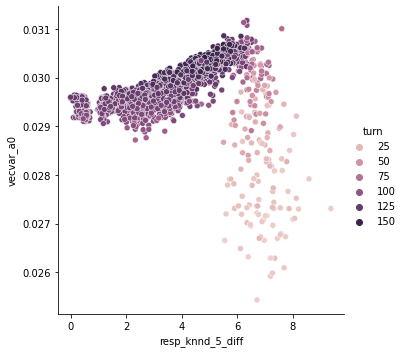

In [86]:
sns.relplot(data=pair_level_agg, y='vecvar_a0', x='resp_knnd_5_diff', hue='turn')
# avg_dist_remain is not a good metric, unless computed at turn 100?
# 

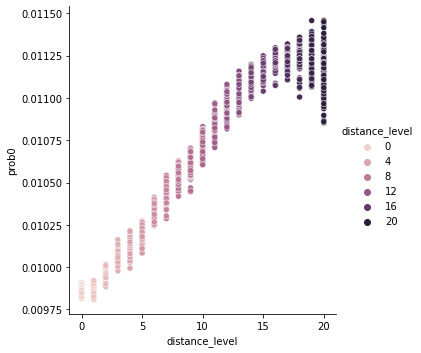

In [99]:
sns.relplot(data=pair_level_agg, y='prob0', x='distance_level', hue='distance_level')
# avg_dist_remain is not a good metric, unless computed at turn 100?
# 

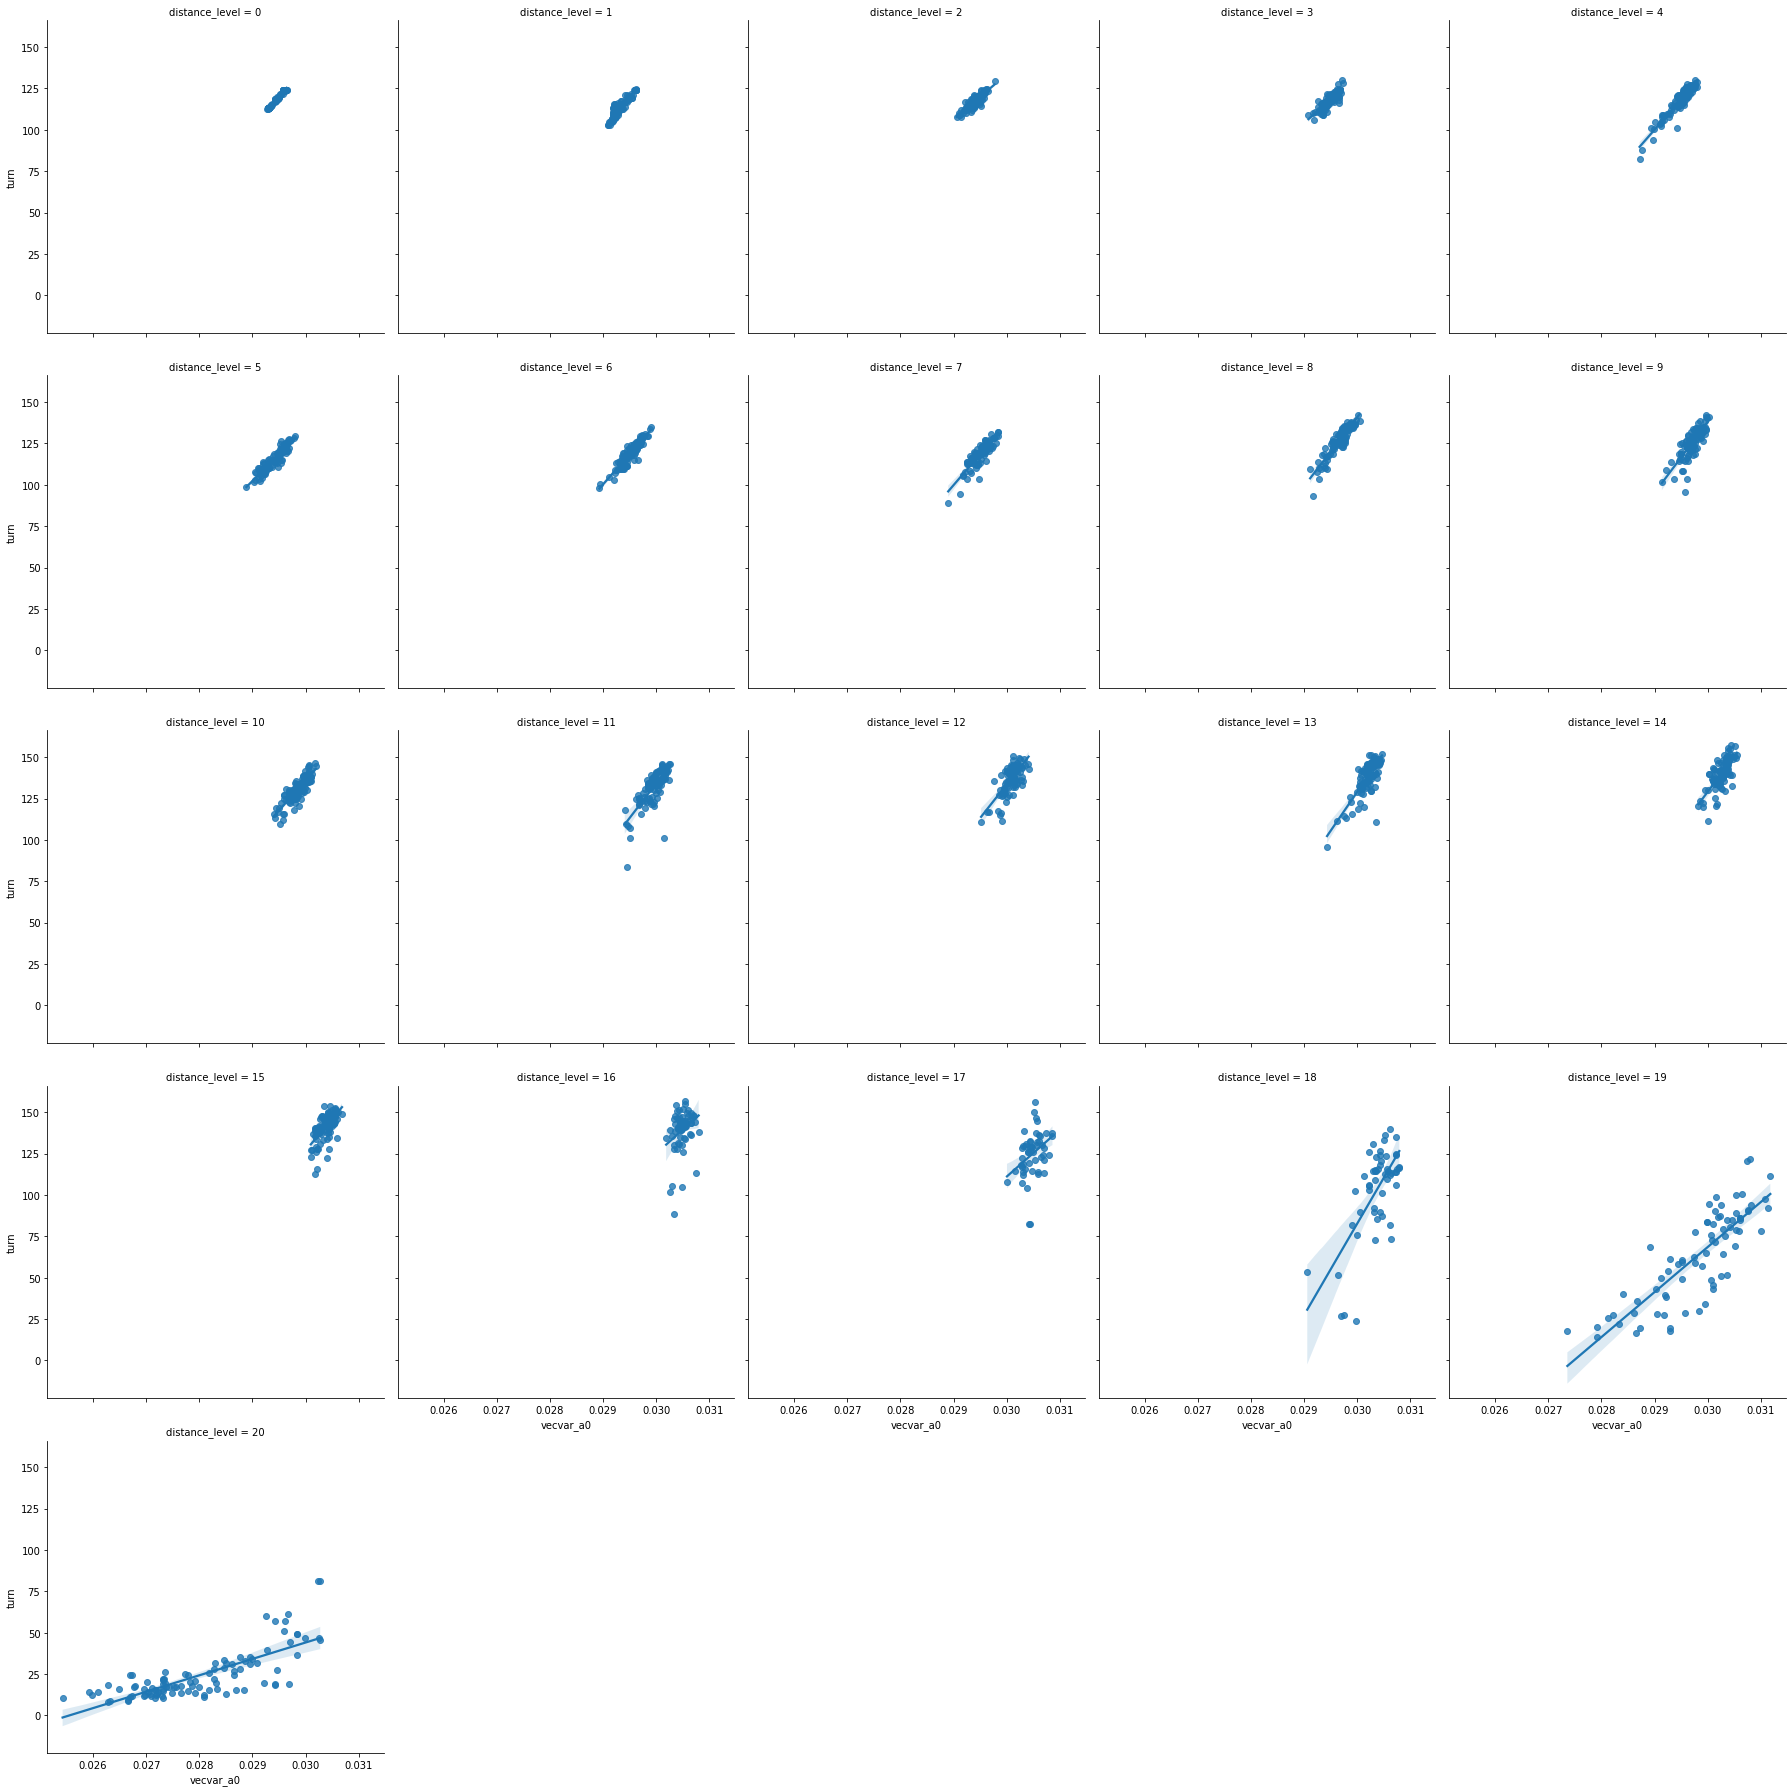

In [97]:
sns.lmplot(data=pair_level_agg, x='vecvar_a0', y='turn', col='distance_level', col_wrap=5)
# avg_dist_remain is not a good metric, unless computed at turn 100?
# 

In [6]:
df = pd.read_csv('diversity_abm/logs/12_02_23/0_back/strict/wiki_12_38_wiki_0_35_2_0.01179.txt')
#df2 = pd.read_csv('diversity_abm/logs/12_02_23/0_back/individual/wiki_12_0_1_0.01179.txt')
#df3 = pd.read_csv('diversity_abm/logs/12_02_23/0_back/individual/wiki_20_0_1_0.01179.txt')

In [7]:
df.columns

Index(['agent', 'turn', 'iter', 'seed', 'response', 'prob0', 'prob1',
       'pos_init_seed_0', 'pos_init_seed_1', 'pos_response_0',
       'pos_response_1', 'threshold', 'nr_sim', 'max_exchanges', 'init_seed',
       'log_id', 'nr_agents', 'resp_knnd_1_a0', 'resp_knnd_3_a0',
       'resp_knnd_5_a0', 'avg_dist_remain', 'avg_knnd_1_a0', 'avg_knnd_3_a0',
       'avg_knnd_5_a0', 'var_knnd_1_a0', 'var_knnd_3_a0', 'var_knnd_5_a0',
       'resp_knnd_1_a1', 'resp_knnd_3_a1', 'resp_knnd_5_a1',
       'avg_dist_remain.1', 'avg_knnd_1_a1', 'avg_knnd_3_a1', 'avg_knnd_5_a1',
       'var_knnd_1_a1', 'var_knnd_3_a1', 'var_knnd_5_a1', 'vecvar_a0',
       'vecvar_a1'],
      dtype='object')

<AxesSubplot:xlabel='vecvar_a0', ylabel='Count'>

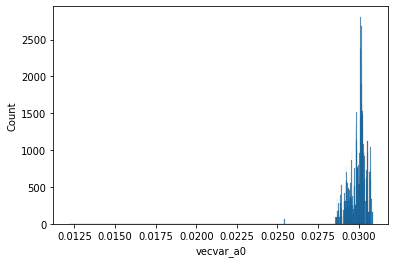

In [39]:
sns.histplot(data=df, x='vecvar_a0', label='1',)
sns.histplot(data=df2, x='vecvar_a0',  label='2')
sns.histplot(data=df3, x='vecvar_a0',  label='3')

In [31]:
target = 'goat'

<AxesSubplot:xlabel='agent', ylabel='avg_dist_remain'>

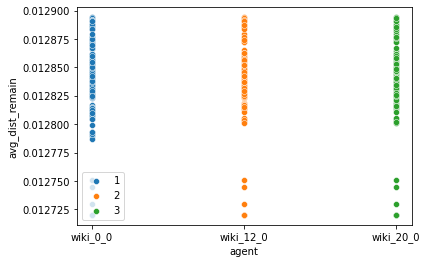

In [27]:
sns.scatterplot(data=df.groupby('init_seed').agg({'avg_dist_remain': 'mean',
                                               'agent': 'first'}).reset_index(), x='agent', y='avg_dist_remain', label='1')
sns.scatterplot(data=df2.groupby('init_seed').agg({'avg_dist_remain': 'mean',
                                                'agent': 'first'}).reset_index(), x='agent', y='avg_dist_remain', label='2')
sns.scatterplot(data=df3.groupby('init_seed').agg({'avg_dist_remain': 'mean',
                                                'agent': 'first'}).reset_index(), x='agent', y='avg_dist_remain', label='3')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = 'diversity_abm/analyses/12_02_23'

In [4]:
def _read_data():
    ds = []
    for n in [0,1,2]:
        for itype in ['strict', 'flexible', 'shortest']:
            fname = f'aggregates_{itype}.tsv'
            d = pd.read_csv(f'{PATH}/{n}_back/{fname}', 
                              sep='\t')
            d.rename({'originality_gain_tot': 'orig_gain_tot'},
                     axis=1, inplace=True)
            ds.append(d)
    return pd.concat(ds, ignore_index=True)

In [5]:
aggs = _read_data()
aggs['diversity_level_dodge'] = (aggs['diversity_level'] - ((aggs['n_back'] - 1)/10))
aggs['fluency_ratio'] = (aggs['fluency_pair'] / 240) * 100
mapdict = json.load(open("diversity_abm/models/12_02_23/dist_mapping.json", "r"))

In [6]:
# aggs['diversity_level'] = aggs['diversity_level'].astype(int).astype(str).replace(mapdict)
aggs['diversity_level_dodge'] = aggs['diversity_level'] # - ((aggs['n_back'] - 1)/10))

In [316]:
exp_1 = aggs[aggs['n_back']==0]
exp_1 = exp_1[exp_1['interaction_type']=='strict']
exp_1['diversity_level'] = exp_1['diversity_level'].astype(int)
exp_2 = aggs.copy()
exp_2 = exp_2[exp_2['interaction_type']=='strict']
exp_2['diversity_level'] = exp_2['diversity_level'].astype(int)
exp_3 = aggs.copy()
exp_3['diversity_level'] = exp_3['diversity_level'].astype(int)

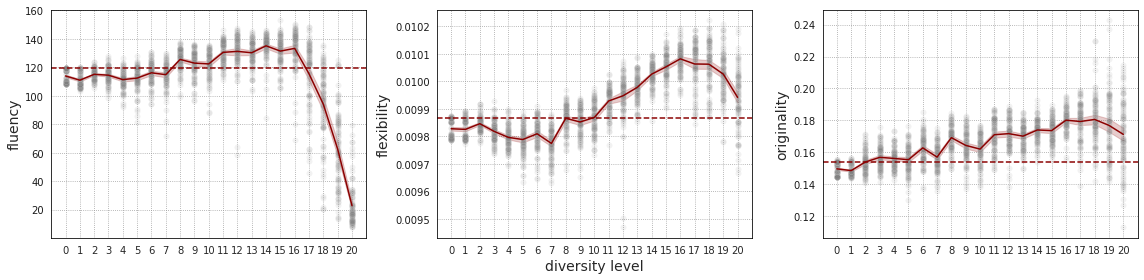

In [322]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))

sns.lineplot(data=exp_1, x='diversity_level', y='fluency_pair', ax=ax[0], color='darkred')
sns.scatterplot(data=exp_1, x='diversity_level', y='fluency_pair', alpha=.1, color='grey', ax=ax[0])
ax[0].set_xlabel('', fontsize=14)
ax[0].set_ylabel('fluency', fontsize=14)
ax[0].set_xticks(range(21), range(21))
ax[0].axhline(exp_1.fluency_a0.mean(), linestyle='--', color='darkred')

sns.lineplot(data=exp_1, x='diversity_level', y='flexibility_speaker', ax=ax[1], color='darkred')
sns.scatterplot(data=exp_1, x='diversity_level', y='flexibility_speaker', alpha=.1, color='grey', ax=ax[1])
ax[1].set_xlabel('diversity level', fontsize=14)
ax[1].set_ylabel('flexibility', fontsize=14)
ax[1].set_xticks(range(21), range(21))
ax[1].axhline(exp_1.flexibility_a0.mean(), linestyle='--', color='darkred')

sns.lineplot(data=exp_1, x='diversity_level', y='orig_pair', ax=ax[2], color='darkred')
sns.scatterplot(data=exp_1, x='diversity_level', y='orig_pair', alpha=.1, color='grey', ax=ax[2])
ax[2].set_xlabel('', fontsize=14)
ax[2].set_ylabel('originality', fontsize=14)
ax[2].set_xticks(range(21), range(21))
ax[2].axhline(exp_1.orig_a0.mean(), linestyle='--', color='darkred')

plt.tight_layout()
plt.show()

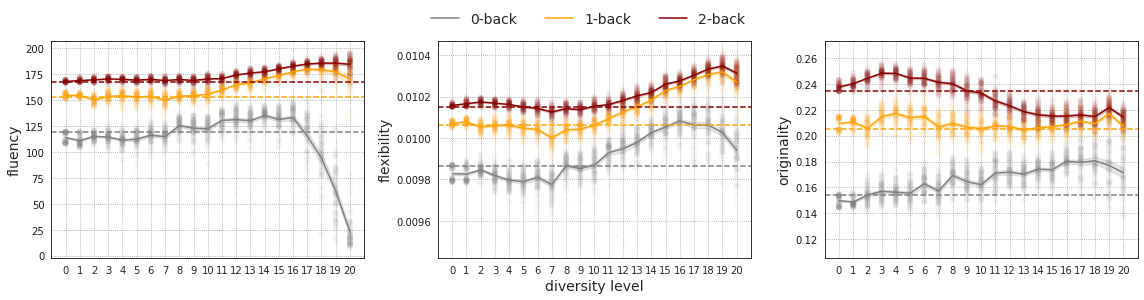

In [323]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4.3))

colors = ['grey', 'orange', 'darkred']

sns.lineplot(data=exp_2, x='diversity_level', y='fluency_pair',hue='n_back', ax=ax[0],
            palette=colors, legend=False)
sns.scatterplot(data=exp_2, x='diversity_level', y='fluency_pair', alpha=.03, hue='n_back', ax=ax[0],
                palette=colors, legend=False)
ax[0].set_xlabel('', fontsize=14)
ax[0].set_ylabel('fluency', fontsize=14)
ax[0].set_xticks(range(21), range(21))
for nb in range(3):
    ax[0].axhline(exp_2[exp_2['n_back']==nb].fluency_a0.mean(),
                  linestyle='--', color=colors[nb])


sns.lineplot(data=exp_2, x='diversity_level', y='flexibility_speaker', hue='n_back', ax=ax[1],
             palette=colors, legend=True)
sns.scatterplot(data=exp_2, x='diversity_level', y='flexibility_speaker', 
                hue='n_back', alpha=.03, ax=ax[1],
                palette=colors, legend=False)
ax[1].set_xlabel('diversity level', fontsize=14)
ax[1].set_ylabel('flexibility', fontsize=14)
ax[1].set_xticks(range(21), range(21))
for nb in range(3):
    ax[1].axhline(exp_2[exp_2['n_back']==nb].flexibility_a0.mean(),
                  linestyle='--', color=colors[nb])

sns.lineplot(data=exp_2, x='diversity_level', y='orig_pair', hue='n_back', ax=ax[2], 
             palette=colors, legend=False)
sns.scatterplot(data=exp_2, x='diversity_level', y='orig_pair', hue='n_back', alpha=.03, ax=ax[2],
                palette=colors, legend=False)
ax[2].set_xlabel('', fontsize=14)
ax[2].set_ylabel('originality', fontsize=14)
ax[2].set_xticks(range(21), range(21))
for nb in range(3):
    ax[2].axhline(exp_2[exp_2['n_back']==nb].orig_a0.mean(),
                  linestyle='--', color=colors[nb])
    
ax[1].legend(bbox_to_anchor=(1.0, 1.1), ncol=3, loc='center right', 
             borderaxespad=0, frameon=False,
             fontsize=14)
for t, l in zip(ax[1].get_legend().texts, 
                ['0-back', '1-back', '2-back']):
    t.set_text(l)

plt.tight_layout()
plt.show()

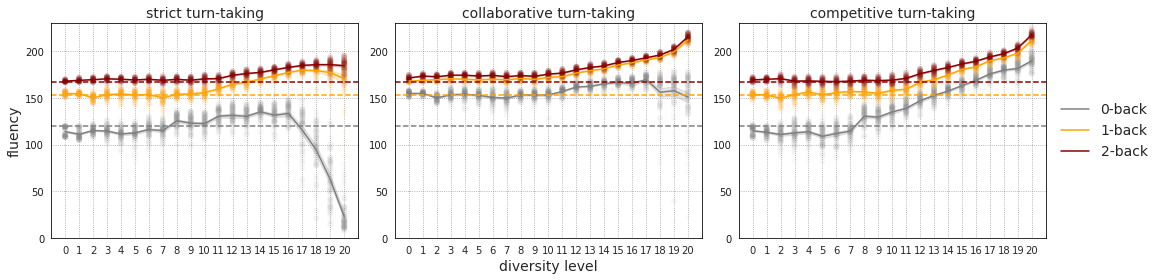

In [340]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))

colors = ['grey', 'orange', 'darkred']

sns.lineplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='fluency_pair',hue='n_back', ax=ax[0],
            palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='fluency_pair', alpha=.03, hue='n_back', ax=ax[0],
                palette=colors, legend=False)
ax[0].set_xlabel('', fontsize=14)
ax[0].set_ylabel('fluency', fontsize=14)
ax[0].set_title('strict turn-taking', fontsize=14)
ax[0].set_xticks(range(21), range(21))
ax[0].set_ylim(0,230)
for nb in range(3):
    ax[0].axhline(exp_2[exp_2['n_back']==nb].fluency_a0.mean(),
                  linestyle='--', color=colors[nb])


sns.lineplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='fluency_pair', hue='n_back', ax=ax[1],
             palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='fluency_pair', 
                hue='n_back', alpha=.03, ax=ax[1],
                palette=colors, legend=False)
ax[1].set_xlabel('diversity level', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].set_title('collaborative turn-taking', fontsize=14)
ax[1].set_xticks(range(21), range(21))
ax[1].set_ylim(0,230)

for nb in range(3):
    ax[1].axhline(exp_2[exp_2['n_back']==nb].fluency_a0.mean(),
                  linestyle='--', color=colors[nb])

sns.lineplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='fluency_pair', hue='n_back', ax=ax[2], 
             palette=colors, legend=True)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='fluency_pair', hue='n_back', alpha=.03, ax=ax[2],
                palette=colors, legend=False)
ax[2].set_xlabel('', fontsize=14)
ax[2].set_ylabel('', fontsize=14)
ax[2].set_title('competitive turn-taking', fontsize=14)
ax[2].set_xticks(range(21), range(21))
ax[2].set_ylim(0,230)
for nb in range(3):
    ax[2].axhline(exp_2[exp_2['n_back']==nb].fluency_a0.mean(),
                  linestyle='--', color=colors[nb])
    
ax[2].legend(bbox_to_anchor=(1.35, .5), loc='center right', 
             borderaxespad=0, frameon=False, fontsize=14)
for t, l in zip(ax[2].get_legend().texts, 
                ['0-back', '1-back', '2-back']):
    t.set_text(l)

plt.tight_layout()
plt.show()

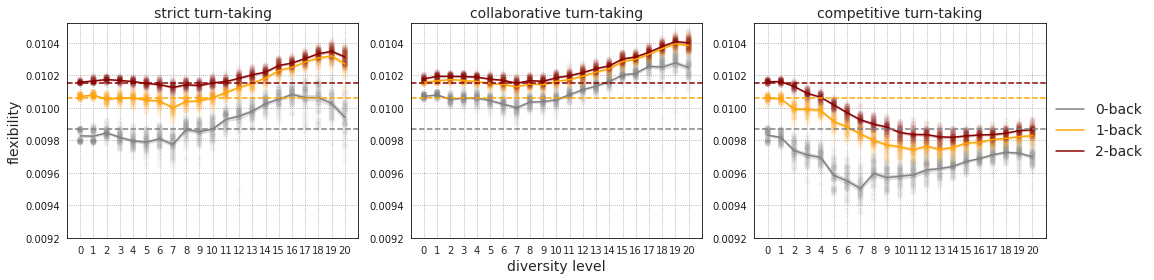

In [341]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))

colors = ['grey', 'orange', 'darkred']

sns.lineplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='flexibility_speaker',hue='n_back', ax=ax[0],
            palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='flexibility_speaker', alpha=.03, hue='n_back', ax=ax[0],
                palette=colors, legend=False)
ax[0].set_xlabel('', fontsize=14)
ax[0].set_ylabel('flexibility', fontsize=14)
ax[0].set_title('strict turn-taking', fontsize=14)
ax[0].set_xticks(range(21), range(21))
for nb in range(3):
    ax[0].axhline(exp_2[exp_2['n_back']==nb].flexibility_a0.mean(),
                  linestyle='--', color=colors[nb])


sns.lineplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='flexibility_speaker', hue='n_back', ax=ax[1],
             palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='flexibility_speaker', 
                hue='n_back', alpha=.03, ax=ax[1],
                palette=colors, legend=False)
ax[1].set_xlabel('diversity level', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].set_title('collaborative turn-taking', fontsize=14)
ax[1].set_xticks(range(21), range(21))
for nb in range(3):
    ax[1].axhline(exp_2[exp_2['n_back']==nb].flexibility_a0.mean(),
                  linestyle='--', color=colors[nb])

sns.lineplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='flexibility_speaker', hue='n_back', ax=ax[2], 
             palette=colors, legend=True)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='flexibility_speaker', hue='n_back', alpha=.03, ax=ax[2],
                palette=colors, legend=False)
ax[2].set_xlabel('', fontsize=14)
ax[2].set_ylabel('', fontsize=14)
ax[2].set_title('competitive turn-taking', fontsize=14)
ax[2].set_xticks(range(21), range(21))
for nb in range(3):
    ax[2].axhline(exp_2[exp_2['n_back']==nb].flexibility_a0.mean(),
                  linestyle='--', color=colors[nb])
    
ax[2].legend(bbox_to_anchor=(1.35, .5), loc='center right', 
             borderaxespad=0, frameon=False, fontsize=14)
for t, l in zip(ax[2].get_legend().texts, 
                ['0-back', '1-back', '2-back']):
    t.set_text(l)

for i in range(3):
    ax[i].set_ylim(0.0092,0.01052)
    
plt.tight_layout()
# plt.suptitle('Fluency', fontsize=16, y=1.05, x=0.48)
plt.show()

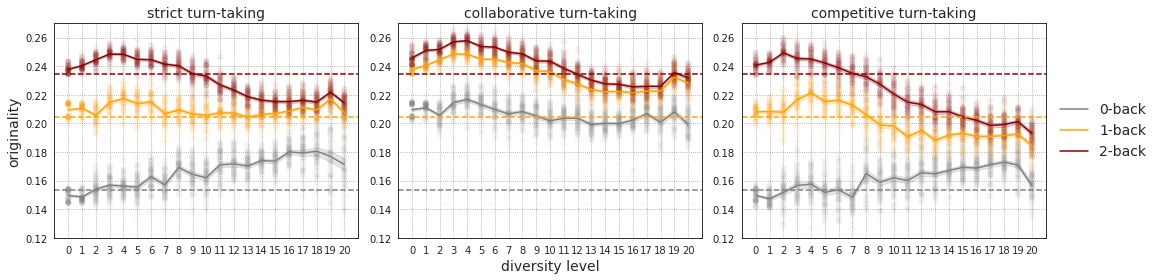

In [346]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))

colors = ['grey', 'orange', 'darkred']

sns.lineplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='orig_pair',hue='n_back', ax=ax[0],
            palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='strict'], x='diversity_level', y='orig_pair', alpha=.03, hue='n_back', ax=ax[0],
                palette=colors, legend=False)
ax[0].set_xlabel('', fontsize=14)
ax[0].set_ylabel('originality', fontsize=14)
ax[0].set_title('strict turn-taking', fontsize=14)
ax[0].set_xticks(range(21), range(21))
for nb in range(3):
    ax[0].axhline(exp_2[exp_2['n_back']==nb].orig_a0.mean(),
                  linestyle='--', color=colors[nb])


sns.lineplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='orig_pair', hue='n_back', ax=ax[1],
             palette=colors, legend=False)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='flexible'], x='diversity_level', y='orig_pair', 
                hue='n_back', alpha=.03, ax=ax[1],
                palette=colors, legend=False)
ax[1].set_xlabel('diversity level', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].set_title('collaborative turn-taking', fontsize=14)
ax[1].set_xticks(range(21), range(21))
for nb in range(3):
    ax[1].axhline(exp_2[exp_2['n_back']==nb].orig_a0.mean(),
                  linestyle='--', color=colors[nb])

sns.lineplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='orig_pair', hue='n_back', ax=ax[2], 
             palette=colors, legend=True)
sns.scatterplot(data=exp_3[exp_3['interaction_type']=='shortest'], x='diversity_level', y='orig_pair', hue='n_back', alpha=.03, ax=ax[2],
                palette=colors, legend=False)
ax[2].set_xlabel('', fontsize=14)
ax[2].set_ylabel('', fontsize=14)
ax[2].set_title('competitive turn-taking', fontsize=14)
ax[2].set_xticks(range(21), range(21))
for nb in range(3):
    ax[2].axhline(exp_2[exp_2['n_back']==nb].orig_a0.mean(),
                  linestyle='--', color=colors[nb])
    
ax[2].legend(bbox_to_anchor=(1.35, .5), loc='center right', 
             borderaxespad=0, frameon=False, fontsize=14)
for t, l in zip(ax[2].get_legend().texts, 
                ['0-back', '1-back', '2-back']):
    t.set_text(l)

for i in range(3):
    ax[i].set_ylim(0.12,0.27)
    
plt.tight_layout()
plt.show()

### Collective inhibition

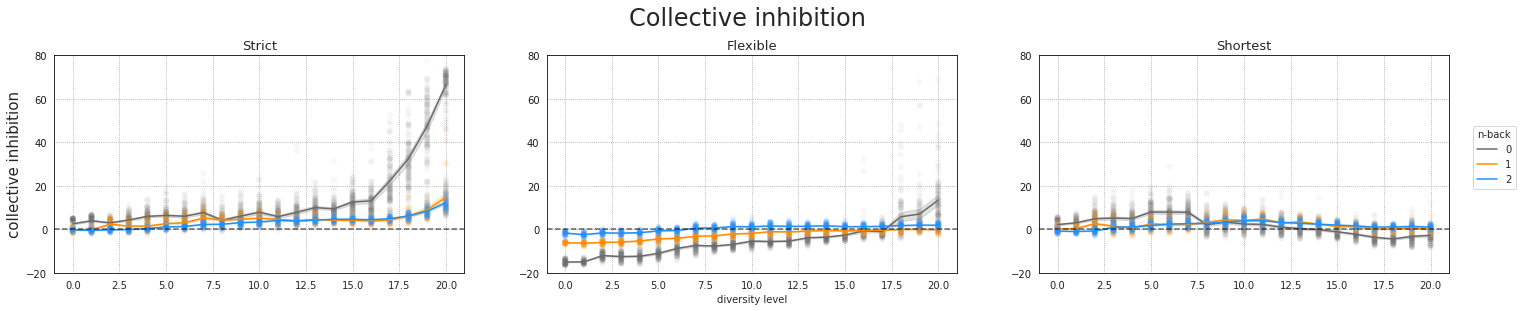

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,4))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                 x='diversity_level_dodge',
                 y='collective_inhibition', ax=ax[col], 
                 hue='n_back',
                 palette=palette)
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                  x='diversity_level_dodge',
                  y='collective_inhibition', ax=ax[col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[col].set_ylim(-20,80)
    ax[col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[col].set_ylabel('collective inhibition', size=15)
    else:
        ax[col].set_ylabel('')
    if col == 2:
        ax[col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, .7), 
                           loc='upper center')
    else:
        ax[col].legend([],[],frameon=False)
    #ax[col].set_xticks(range(21))
    if col == 1:
        ax[col].set_xlabel('diversity level')
    else:
        ax[col].set_xlabel('')

plt.suptitle('Collective inhibition', size=24, y=1.05, x=.51)
plt.show()

### Flexibility

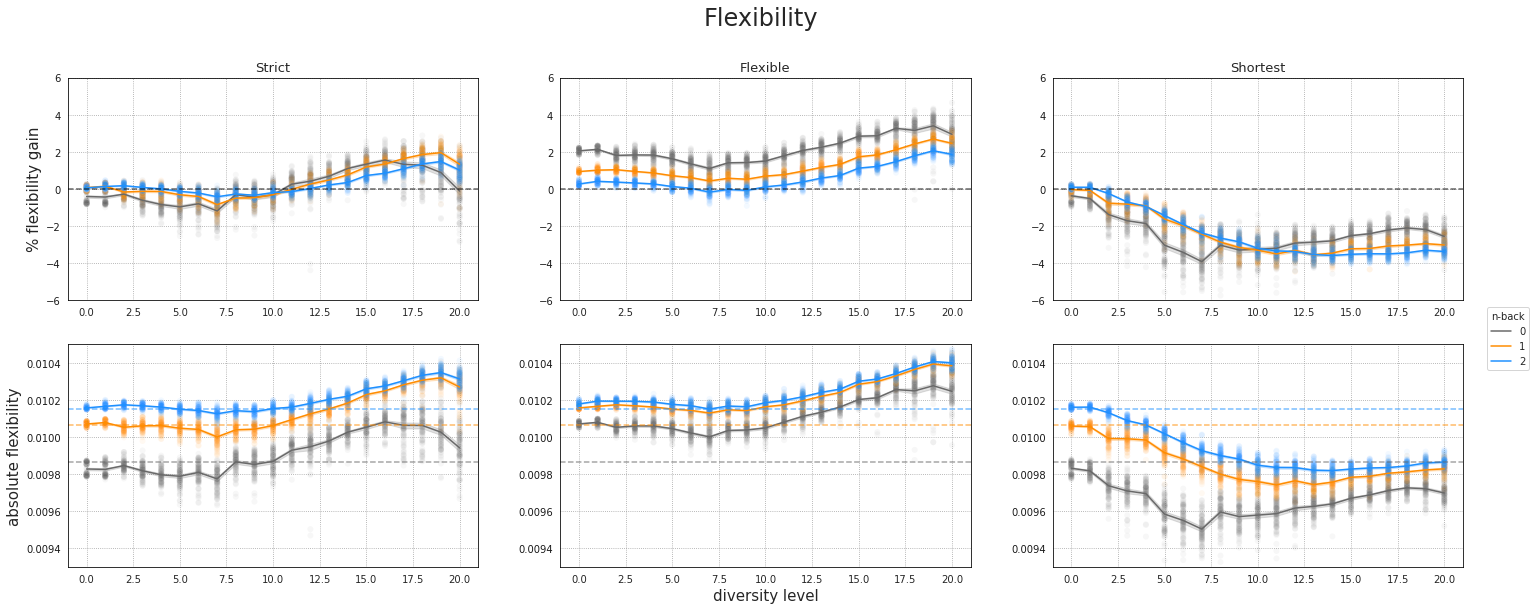

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,9))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                 x='diversity_level_dodge',
                 y='flexibility_gain_tot', ax=ax[0,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                  x='diversity_level_dodge',
                  y='flexibility_gain_tot', ax=ax[0,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[0,col].set_ylim(-6,6)
    ax[0,col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[0,col].set_ylabel('% flexibility gain', size=15)
    else:
        ax[0,col].set_ylabel('')
    if col == 2:
        ax[0,col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, -.01), 
                           loc='upper center')
    else:
        ax[0,col].legend([],[],frameon=False)
    #ax[0,col].set_xticks(range(21))
    
    # Fluency absolute
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=100)],
                 x='diversity_level_dodge',
                 y='flexibility_speaker', ax=ax[1,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=100)],
                  x='diversity_level_dodge',
                  y='flexibility_speaker', ax=ax[1,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    for n in range(3):
        ax[1,col].axhline(aggs[aggs['n_back']==n].flexibility_a0.iloc[0],
                          color=palette[n], linestyle='--', alpha=.6)
    
    ax[1,col].set_ylim(0.0093,0.0105)
    ax[1,col].set_title('')
    if col == 0:
        ax[1,col].set_ylabel('absolute flexibility', size=15)
    else:
        ax[1,col].set_ylabel('')
    ax[1,col].legend([],[],frameon=False)
    #ax[1,col].set_xticks(range(21))    
    
    if col == 1:
        ax[1,col].set_xlabel('diversity level', size=15)
    else:
        ax[1,col].set_xlabel('')
    ax[0,col].set_xlabel('')
plt.suptitle('Flexibility', size=24, y=0.99, x=.51)
plt.show()

### Originality

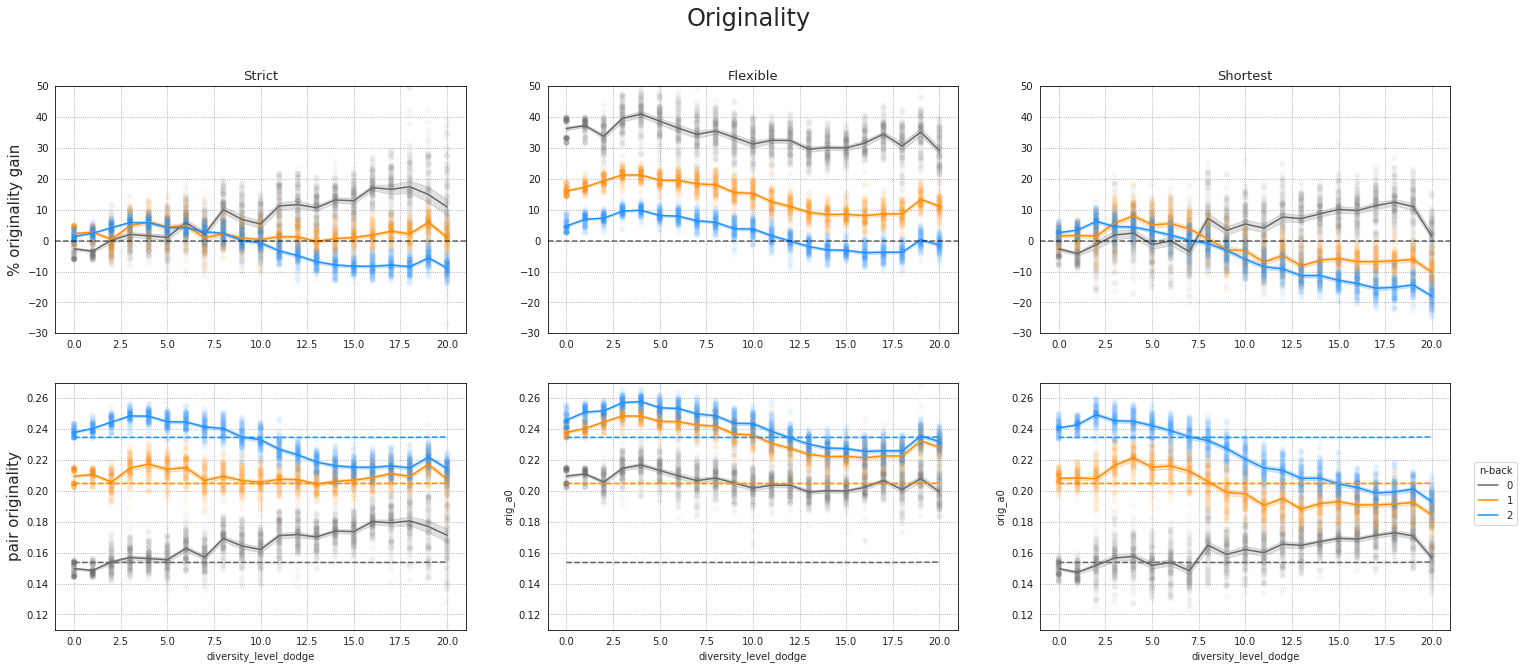

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                 x='diversity_level_dodge',
                 y='orig_gain_tot', ax=ax[0,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                  x='diversity_level_dodge',
                  y='orig_gain_tot', ax=ax[0,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[0,col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[0,col].set_ylabel('% originality gain', size=15)
    else:
        ax[0,col].set_ylabel('')
    
    # Originality absolute
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                 x='diversity_level_dodge',
                 y='orig_pair', ax=ax[1,col], 
                 hue='n_back',
                 palette=palette)
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                  x='diversity_level_dodge',
                  y='orig_pair', ax=ax[1,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].set_ylim(-30,50)
    ax[1,col].set_ylim(0.11,0.27)
    ax[1,col].set_title('')
    if col == 0:
        ax[1,col].set_ylabel('pair originality', size=15)
    else:
        ax[1,col].set_ylabel('')
    ax[1,col].legend([],[],frameon=False)
    #ax[0,col].set_xticks(range(21))    
    #ax[1,col].set_xticks(range(21))    
    ax[1,col].set_xlabel('')
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col])],
                 x='diversity_level_dodge',
                 y='orig_a0', ax=ax[1,col],
                 linestyle='--',
                 hue='n_back',
                 palette=palette, legend=False) 
    ax[0,col].set_xlabel('')
    ax[0,col].legend([],[],frameon=False)
    if col == 2:
        ax[1,col].legend(title='n-back', 
                         bbox_to_anchor=(1.11, .7), 
                         loc='upper center')
    else:
        ax[1,col].legend([],[],frameon=False)
plt.suptitle('Originality', size=24, y=0.99, x=.51)
plt.show()